In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [16]:
df = pd.read_csv(list(uploaded.keys())[0])
print(df.head())


     Time        V1        V2        V3        V4        V5   Amount  Class
0  121958 -2.289061 -1.313758 -0.452562 -0.392802  0.224787  1600.89      0
1  146867  1.432482 -1.095302 -0.129910 -1.362911 -1.017335  4191.85      0
2  131932  1.214722 -0.168797  0.581433  0.699020  0.964415  3271.32      0
3  103694 -0.880864  0.110956 -0.203236 -0.243510  0.362543  1377.51      0
4  119879 -0.881879  0.786970  1.110118  0.015365 -1.135162  4838.72      0


In [17]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [20]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Model Trained Successfully!")

Model Trained Successfully!


In [28]:

def predict_fraud(input_list):
    scaled = scaler.transform([input_list])
    pred = model.predict(scaled)[0]
    return "FRAUD" if pred == 1 else "NOT FRAUD"
    print("\nEnter transaction details to predict:")

In [30]:
sample = []

for col in X.columns:
    value = float(input(f"Enter value for {col}: "))
    sample.append(value)

result = predict_fraud(sample)
print("\nPrediction:", result)

Enter value for Time: 789
Enter value for V1: 456
Enter value for V2: 478
Enter value for V3: 256
Enter value for V4: 785
Enter value for V5: 7853
Enter value for Amount: 2458

Prediction: FRAUD


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import matplotlib.pyplot as plt

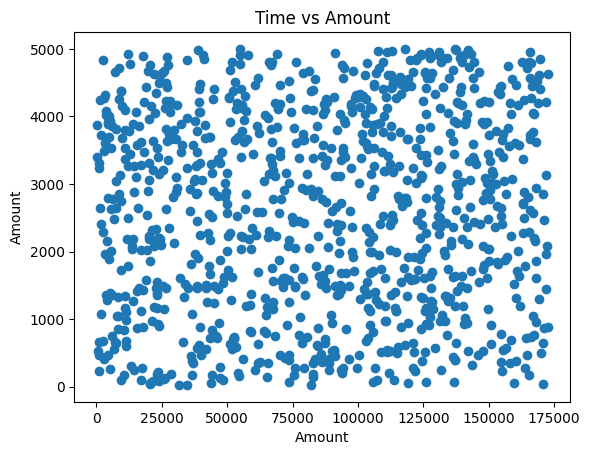

In [32]:
plt.scatter(df['Time'],df['Amount'])
plt.title("Time vs Amount")
plt.xlabel("Amount")
plt.ylabel("Amount")
plt.show()
plt.show()